In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score

#Used a function to get the adult dataframe
def get_df():
    headers=["age","workclass","fnlwgt","education", "education-num", "marital-status", "occupation","relationship",
         "race", "sex", "capital-gain", "captial-loss","hours-per-week","native-country","income"]

    adult_df = pd.read_csv("../week_06/adult.data", encoding_errors='ignore', delimiter = ' ', on_bad_lines='skip', names= headers )
    adult_df.drop(['education-num','occupation','capital-gain','captial-loss','fnlwgt','marital-status','native-country'], axis = 'columns', inplace=True)
    
    return adult_df

adult_df = get_df()

In [174]:
get_df()

,age,workclass,education,relationship,race,sex,hours-per-week,income
0,"39,","State-gov,","Bachelors,","Not-in-family,","White,","Male,","40,",<=50K
1,"50,","Self-emp-not-inc,","Bachelors,","Husband,","White,","Male,","13,",<=50K
2,"38,","Private,","HS-grad,","Not-in-family,","White,","Male,","40,",<=50K
3,"53,","Private,","11th,","Husband,","Black,","Male,","40,",<=50K
4,"28,","Private,","Bachelors,","Wife,","Black,","Female,","40,",<=50K
...,...,...,...,...,...,...,...,...
32556,"27,","Private,","Assoc-acdm,","Wife,","White,","Female,","38,",<=50K
32557,"40,","Private,","HS-grad,","Husband,","White,","Male,","40,",>50K
32558,"58,","Private,","HS-grad,","Unmarried,","White,","Female,","40,",<=50K
32559,"22,","Private,","HS-grad,","Own-child,","White,","Male,","20,",<=50K


In [175]:
def cleaning_data(adult_df):
    adult_df['sex'] = np.where(adult_df['sex'] == 'Male,', 1, 0)
    adult_df['income'] = np.where(adult_df['income'] == '<=50K', 1, 0)
    race_map = {'White,':1,'Black,':2,'Asian-Pac-Islander,':3,'Amer-Indian-Eskimo,':4,'Other,':5}
    adult_df['race'] = adult_df['race'].map(race_map)
    class_labels = LabelEncoder()
    adult_df['hours-per-week'] = class_labels.fit_transform(adult_df['hours-per-week'].values)
    adult_df['age'] = class_labels.fit_transform(adult_df['age'].values)
    adult_df['workclass'] = class_labels.fit_transform(adult_df['workclass'].values)
    adult_df['education'] = class_labels.fit_transform(adult_df['education'].values)
    #adult_df['marital-status'] = class_labels.fit_transform(adult_df['marital-status'].values)
    adult_df['relationship'] = class_labels.fit_transform(adult_df['relationship'].values)
    adult_df['race'] = class_labels.fit_transform(adult_df['race'].values)
    #adult_df['native-country'] = class_labels.fit_transform(adult_df['native-country'].values)
    return adult_df

In [176]:
cleaning_data(adult_df)   

,age,workclass,education,relationship,race,sex,hours-per-week,income
0,22,7,9,1,0,1,34,1
1,33,6,9,0,0,1,4,1
2,21,4,11,1,0,1,34,1
3,36,4,1,0,1,1,34,1
4,11,4,9,5,1,0,34,1
...,...,...,...,...,...,...,...,...
32556,10,4,7,5,0,0,31,1
32557,23,4,11,0,0,1,34,0
32558,41,4,11,4,0,0,34,1
32559,5,4,11,3,0,1,12,1


<Axes: >

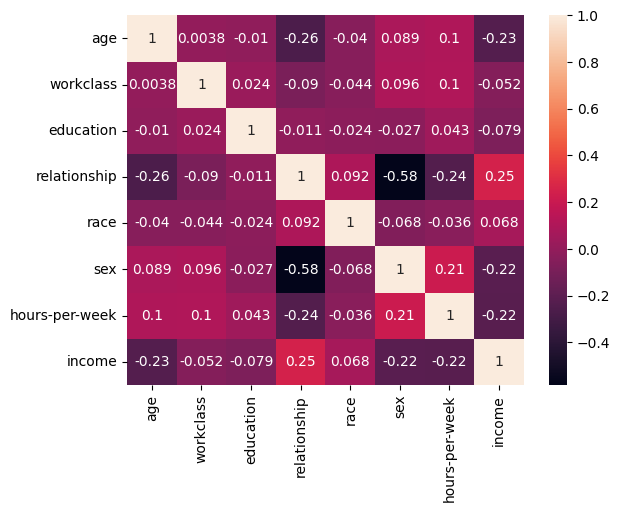

In [177]:
correlation = adult_df.corr()
sns.heatmap(correlation, annot=True)

In [178]:
def log_regression(adult_df):
    X = adult_df.drop('income', axis=1)
    y = adult_df['income']

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)
    sc = StandardScaler() 
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)

    ros = RandomOverSampler(random_state=32)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    model = LogisticRegression(random_state=32)
    model.fit(X_resampled, y_resampled)
   
   
    y_pred = model.predict(X_test)
    y_pred

    knn = KNeighborsClassifier(n_neighbors=13)
    knn.fit(X_train, y_train)
    
    score = knn.score(X_test, y_test)
    print(score)
    accuracy_score = model.score(X_test, y_test)
    print(accuracy_score)
    #ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, marker = ".")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    return auc

0.8131429448794718
0.6818670351604483


0.7032485247071115

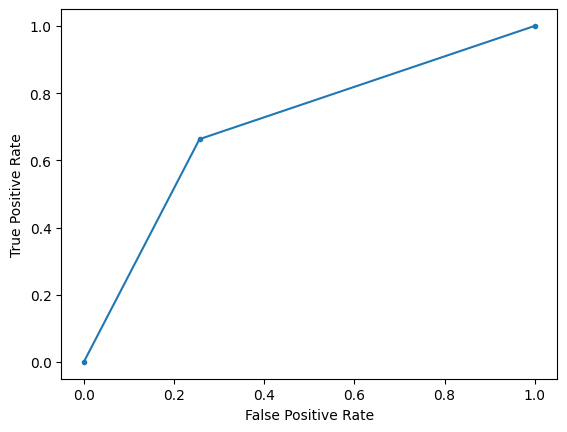

In [179]:
log_regression(adult_df)

c:\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7592384072064694


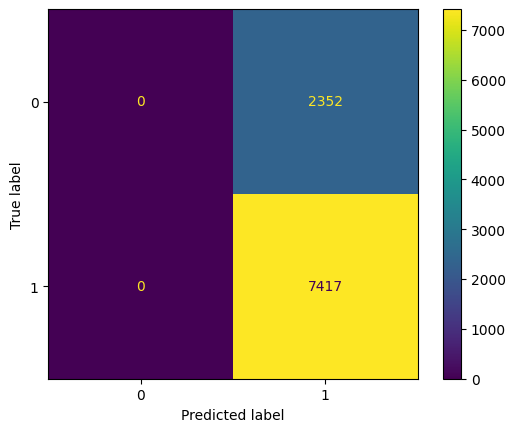

In [180]:

def SVM():
    X = adult_df.drop('income', axis=1)
    y = adult_df['income']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify =y)
    classifier = LinearSVC()
    classifier.fit(X_train, y_train)
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    print(classifier.score(X_test, y_test))

SVM()

In [ ]:
#Thoughts
# So I have made drastic changes compared to my homework six assignment.
# On the smaller end, I did drop a few more columns that I think wasn't necessary.
# But on the larger end, I changed the X and y variables within the train test split.
# I did this becuase my previously X and y variables were not working properly.
# I also felt like my numbers were very funky. So instead of using one column
# to predict the income, I instead use them all and my numbers came out alot better.
# However, all numbers are different because I changed the variable so I can't make a accurate 
# comparison.

In [ ]:
# Outlier detection  helps identify unusual patterns or errors in the information.
# Some methods are Z-score, Local outlier Factor, Isolation forest, and DBSCAN